# Osnovne statistike

*Osnovne statistike o podatkih o živalih iz zavetišča horjul.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
zivali = pd.read_csv('zivali.csv')

## Število dni preživetih v zavetišču za posamezno žival

In [3]:
st_dni = []
animals = [] 
for id in zivali['id'].unique():
    datum_sprejema_str = zivali.loc[zivali['id'] == id, 'datum_sprejema'].iloc[0]
    datum_oddaje_str = zivali.loc[zivali['id'] == id, 'datum_oddaje'].iloc[0]
    #convertam string v date če niso NaN ali x
    if pd.notna(datum_sprejema_str) and pd.notna(datum_oddaje_str) and datum_sprejema_str != 'x' and datum_oddaje_str != 'x':
        datum_sprejema = datetime.strptime(datum_sprejema_str, "%d/%m/%Y")
        datum_oddaje = datetime.strptime(datum_oddaje_str, "%d/%m/%Y")
        #zračunam število dni v zavetišču in appendam
        st_dni_v_zavetiscu = (datum_oddaje - datum_sprejema).days
        #dodan pogoj ker je par podatkov čudnih
        if st_dni_v_zavetiscu > 0:
            animals.append(id)
            st_dni.append(st_dni_v_zavetiscu)

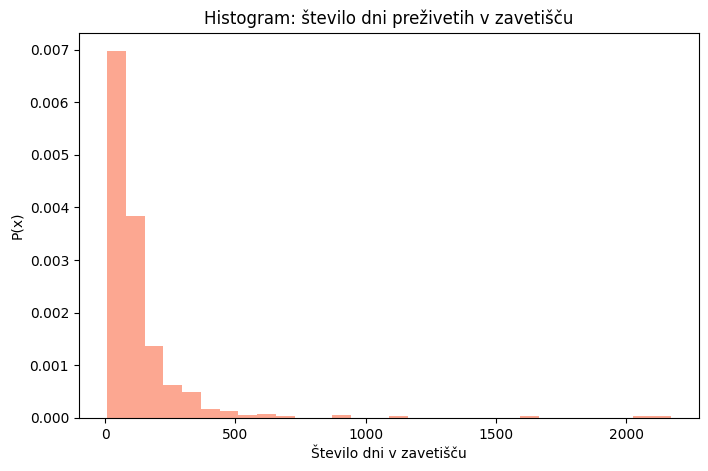

Povprečno število dni preživetih v zavetišču: 125.17825311942958


In [4]:
#narišem histogram
plt.figure(figsize=(8, 5))
plt.hist(st_dni, bins=30, density=True, alpha=0.6, color='#FB6D48')
plt.title("Histogram: število dni preživetih v zavetišču")
plt.xlabel("Število dni v zavetišču")
plt.ylabel("P(x)")
plt.show()
print("Povprečno število dni preživetih v zavetišču: " + str(np.mean(st_dni)))

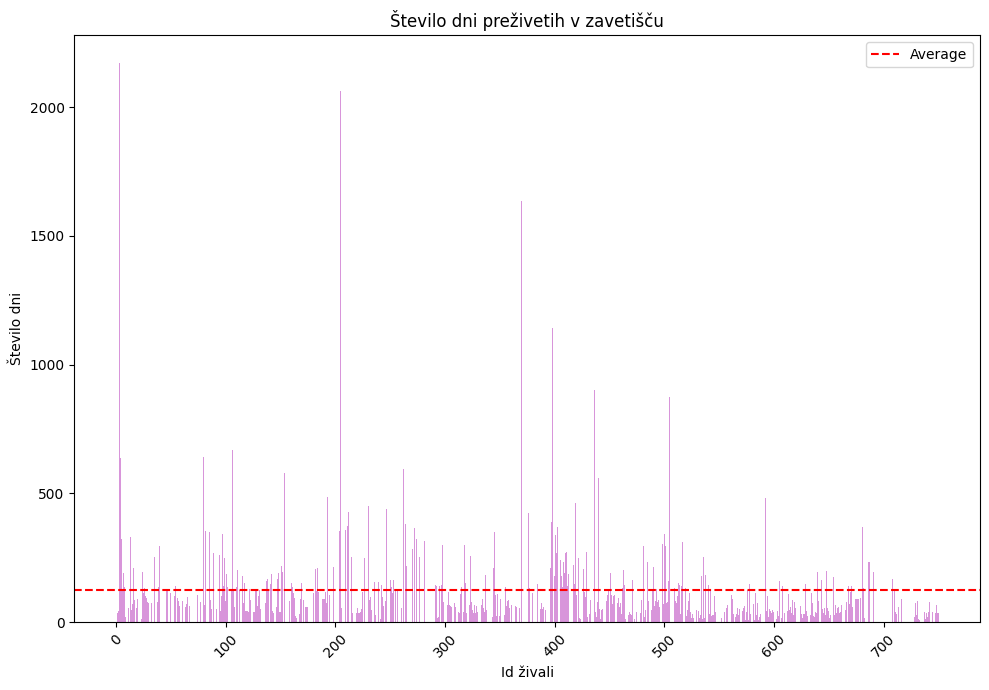

In [5]:
povp_dni = np.mean(st_dni)

plt.figure(figsize=(10, 7))
plt.bar(animals, st_dni, color='#D895DA')
plt.axhline(y=povp_dni, color='r', linestyle='--', label='Average')  #horizontalna črta za povprečje
plt.xlabel('Id živali')
plt.ylabel('Število dni')
plt.title("Število dni preživetih v zavetišču")
plt.xticks(rotation=45)  
plt.legend()  
plt.tight_layout() 
plt.show()


## Veterinska oskrba živali v zavetišču

In [6]:
from csv import DictReader
oskrba_zivali = DictReader(open('veterinarska_oskrba.csv', 'rt', encoding='utf-8'))

In [7]:
oskrba = dict()
for row in oskrba_zivali:
    # id_zivali = row["id"] ne zanima
    kastriran = int(row["sterilizirana_kastrirana"])
    cepljen = int(row["cepljena"])
    cipiran = int(row["cipirana"])
    parametri = (kastriran, cepljen, cipiran) #tuple npr. (1, 1, 1) -> celotna oskrba
    if parametri not in oskrba:
        oskrba[parametri] = 0
    oskrba[parametri] += 1
sortedOskrba = sorted(oskrba.items(), key=lambda x: x[1], reverse=True) #da ni nametan

In [8]:
labels = []
for parametri, n in sortedOskrba:
    #samo za izpis
    kastriran = "SO kastrirane/sterilizirane" if parametri[0] == 1 else "NISO kastirane/sterilizirane"
    cepljen = "SO cepljene" if parametri[1] == 1 else "NISO cepljene"
    cipiran = "SO čipirane" if parametri[2] == 1 else "NISO čipirane"
    print(f'Število živali, ki {kastriran}, {cepljen}, {cipiran}: {n}.')
    
    #za labels v grafu
    kastriran = "kastrirane/sterilizirane" if parametri[0] == 1 else ""
    cepljen = "cepljene" if parametri[1] == 1 else ""
    cipiran = "čipirane" if parametri[2] == 1 else ""
    if kastriran == "" and cepljen == "" and cipiran == "":
        parms = "brez oskrbe"
    else:
        parms = f"{kastriran} {cepljen} {cipiran}"
    labels.append((parms, n))

Število živali, ki SO kastrirane/sterilizirane, SO cepljene, SO čipirane: 621.
Število živali, ki NISO kastirane/sterilizirane, NISO cepljene, NISO čipirane: 106.
Število živali, ki NISO kastirane/sterilizirane, SO cepljene, SO čipirane: 13.
Število živali, ki SO kastrirane/sterilizirane, NISO cepljene, SO čipirane: 10.
Število živali, ki SO kastrirane/sterilizirane, SO cepljene, NISO čipirane: 5.
Število živali, ki NISO kastirane/sterilizirane, SO cepljene, NISO čipirane: 1.
Število živali, ki SO kastrirane/sterilizirane, NISO cepljene, NISO čipirane: 1.


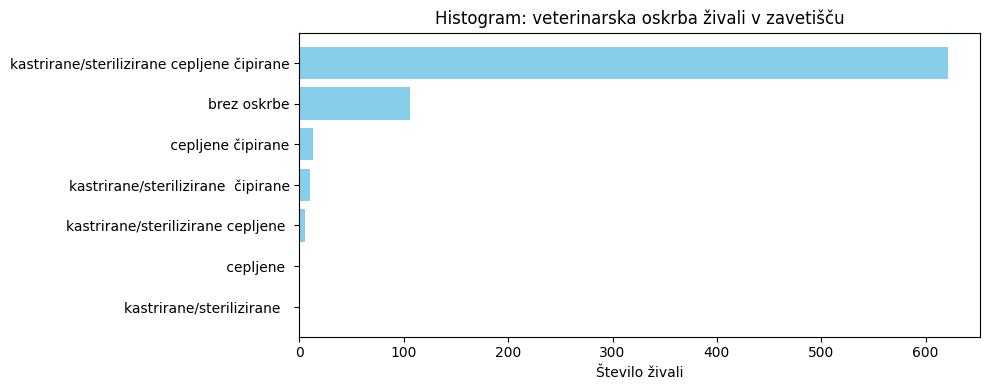

In [9]:
kategorije = [str(parametri) for parametri, _ in labels][::-1]
koliko = [n for _, n in labels][::-1]

plt.figure(figsize=(10, 4))
plt.barh(kategorije, koliko, color='skyblue')
plt.xlabel('Število živali')
plt.title('Histogram: veterinarska oskrba živali v zavetišču')
plt.tight_layout()
plt.show()

In [10]:
labels = {"Polna oskrba": 0, "Delna oskrba": 0, "Brez oskrbe": 0}

for parametri, n in sortedOskrba:
    #za labels v grafu
    if parametri[0] == 1 and parametri[1] == 1 and parametri[2] == 1:
        parms = "Polna oskrba"
    elif parametri[0] == 0 and parametri[1] == 0 and parametri[2] == 0:
        parms = "Brez oskrbe"
    else:
        parms = "Delna oskrba"
    labels[parms] += n
    #izpis

print(labels)

{'Polna oskrba': 621, 'Delna oskrba': 30, 'Brez oskrbe': 106}


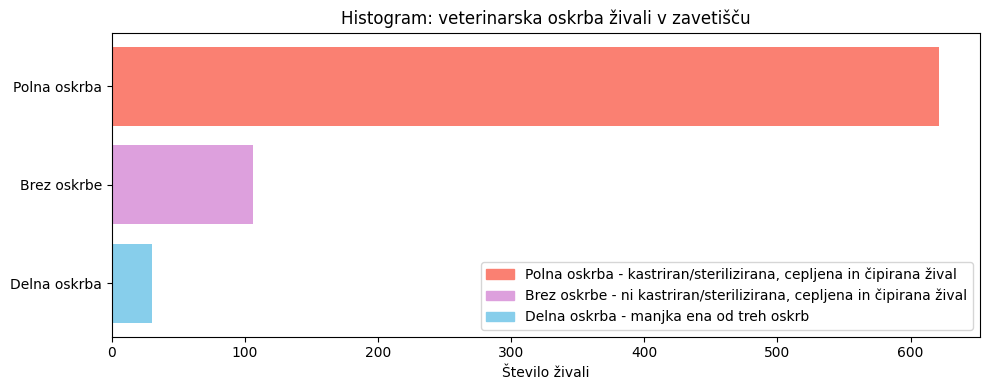

In [11]:
import matplotlib.patches as mpatches

sortedLabels = sorted(labels.items(), key=lambda x: x[1], reverse=True) # uredi
kategorije = [parametri for parametri, _ in sortedLabels][::-1]
koliko = [n for _, n in sortedLabels][::-1]
colors = ['skyblue', 'plum', 'salmon']

plt.figure(figsize=(10, 4))
bars = plt.barh(kategorije, koliko, color=colors)
plt.xlabel('Število živali')
plt.title('Histogram: veterinarska oskrba živali v zavetišču')
plt.tight_layout()

# Legend
legend_labels = ['Polna oskrba - kastriran/sterilizirana, cepljena in čipirana žival',
                 'Brez oskrbe - ni kastriran/sterilizirana, cepljena in čipirana žival',
                 'Delna oskrba - manjka ena od treh oskrb',
                ]
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors[::-1], legend_labels)]
plt.legend(handles=legend_patches, loc='lower right')
plt.show()
